<a href="https://colab.research.google.com/github/mohanrajmit/DL-Training/blob/master/Facial-Expression-Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tarfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

%matplotlib inline

In [2]:
!git clone https://github.com/mohanrajmit/Pixel-level-semantic-segmentaiton.git

Cloning into 'Pixel-level-semantic-segmentaiton'...
remote: Enumerating objects: 9, done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 9
Unpacking objects: 100% (9/9), done.


In [3]:
!ls

Pixel-level-semantic-segmentaiton  sample_data


In [22]:
tar = tarfile.open("Pixel-level-semantic-segmentaiton/fer2013.tar.gz")
df = pd.read_csv(tar.extractfile("fer2013/fer2013.csv"))
df.head()

emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

In [24]:
df["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [25]:
train = df[["emotion", "pixels"]][df["Usage"] == "Training"]
train.isnull().sum()

emotion    0
pixels     0
dtype: int64

In [26]:
train['pixels'] = train['pixels'].apply(lambda im: np.fromstring(im, sep=' '))
x_train = np.vstack(train['pixels'].values)
y_train = np.array(train["emotion"])
x_train.shape, y_train.shape

((28709, 2304), (28709,))

In [27]:
public_test_df = df[["emotion", "pixels"]][df["Usage"]=="PublicTest"]

In [28]:
public_test_df["pixels"] = public_test_df["pixels"].apply(lambda im: np.fromstring(im, sep=' '))
x_test = np.vstack(public_test_df["pixels"].values)
y_test = np.array(public_test_df["emotion"])

In [29]:
x_train = x_train.reshape(-1, 48, 48, 1)
x_test = x_test.reshape(-1, 48, 48, 1)
x_train.shape, x_test.shape

((28709, 48, 48, 1), (3589, 48, 48, 1))

In [30]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_train.shape, y_test.shape

((28709, 7), (3589, 7))

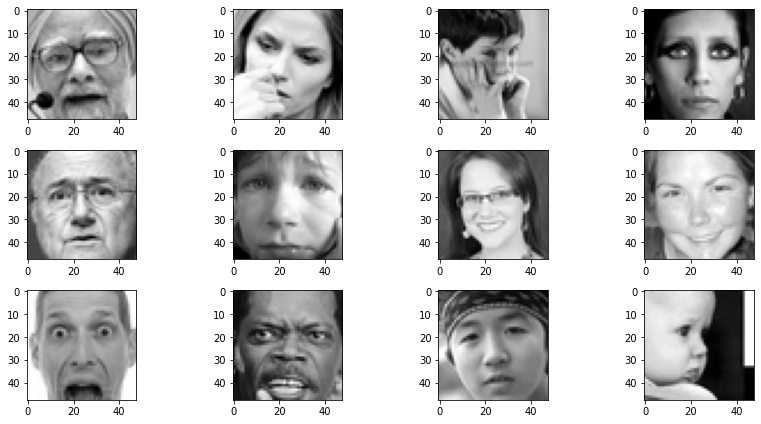

In [32]:
import seaborn as sns
plt.figure(0, figsize=(12,6))
for i in range(1, 13):
    plt.subplot(3,4,i)
    plt.imshow(x_train[i, :, :, 0], cmap="gray")

plt.tight_layout()
plt.show()

In [37]:
model = Sequential()

model.add(Conv2D(64, 3, kernel_initializer="he_normal", input_shape=(48, 48, 1),activation='relu'))
model.add(Conv2D(64, 3,activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(32, 3,activation='relu'))
model.add(Conv2D(32, 3,activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 conv2d_9 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 20, 32)        18464     
                                                                 
 conv2d_11 (Conv2D)          (None, 18, 18, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                  

In [43]:
# num epochs
epochs = 100

# run model
hist = model.fit(x_train, y_train,batch_size=40, epochs=epochs, validation_data=(x_test, y_test))


Epoch 1/100
718/718 [==============================] - 16s 22ms/step - loss: 1.8620 - accuracy: 0.2511 - val_loss: 1.8167 - val_accuracy: 0.2494
Epoch 2/100
718/718 [==============================] - 16s 22ms/step - loss: 1.8128 - accuracy: 0.2514 - val_loss: 1.8136 - val_accuracy: 0.2497
Epoch 3/100
718/718 [==============================] - 15s 22ms/step - loss: 1.8116 - accuracy: 0.2516 - val_loss: 1.8128 - val_accuracy: 0.2491
Epoch 4/100
718/718 [==============================] - 16s 22ms/step - loss: 1.8104 - accuracy: 0.2518 - val_loss: 1.8135 - val_accuracy: 0.2497
Epoch 5/100
718/718 [==============================] - 16s 22ms/step - loss: 1.8109 - accuracy: 0.2518 - val_loss: 1.8126 - val_accuracy: 0.2494
Epoch 6/100
718/718 [==============================] - 16s 22ms/step - loss: 1.8114 - accuracy: 0.2514 - val_loss: 1.8112 - val_accuracy: 0.2497
Epoch 7/100
718/718 [==============================] - 16s 23ms/step - loss: 1.8099 - accuracy: 0.2515 - val_loss: 1.8117 - val_ac

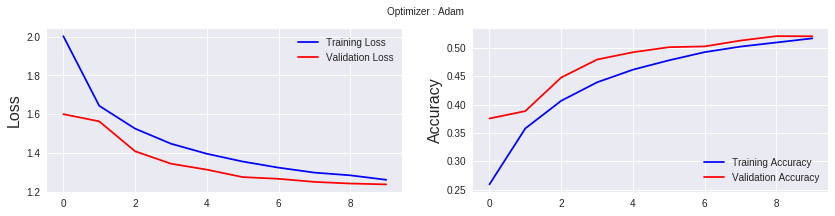

In [ ]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color='b', label='Training Loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['acc'], color='b', label='Training Accuracy')
plt.plot(hist.history['val_acc'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
test = df[["emotion", "pixels"]][df["Usage"] == "PrivateTest"]
test["pixels"] = test["pixels"].apply(lambda im: np.fromstring(im, sep=' '))
test.head()

emotion                                             pixels
32298        0  [170.0, 118.0, 101.0, 88.0, 88.0, 75.0, 78.0, ...
32299        5  [7.0, 5.0, 8.0, 6.0, 7.0, 3.0, 2.0, 6.0, 5.0, ...
32300        6  [232.0, 240.0, 241.0, 239.0, 237.0, 235.0, 246...
32301        4  [200.0, 197.0, 149.0, 139.0, 156.0, 89.0, 111....
32302        2  [40.0, 28.0, 33.0, 56.0, 45.0, 33.0, 31.0, 78....

In [ ]:
x_test_private = np.vstack(test["pixels"].values)
y_test_private = np.array(test["emotion"])

In [ ]:
x_test_private = x_test_private.reshape(-1, 48, 48, 1)
y_test_private = np_utils.to_categorical(y_test_private)
x_test_private.shape, y_test_private.shape

((3589, 48, 48, 1), (3589, 7))

In [ ]:
score = model.evaluate(x_test_private, y_test_private, verbose=0)
score

[1.236521938977118, 0.5257731959095039]

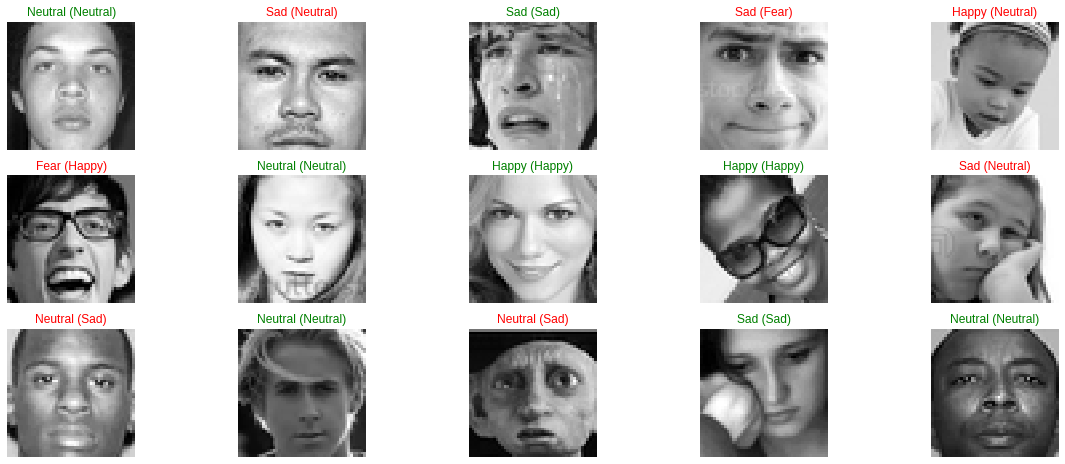

In [ ]:
y_hat = model.predict(x_test_private)

face_exp_labels=["Angry", "Disgust",
                     "Fear", "Happy",
                     "Sad", "Surprise",
                     "Neutral"]

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test_private.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test_private[index]),cmap="gray")
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test_private[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(face_exp_labels[predict_index], 
                                  face_exp_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))